In [1]:
#Imports for the project: 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense



array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

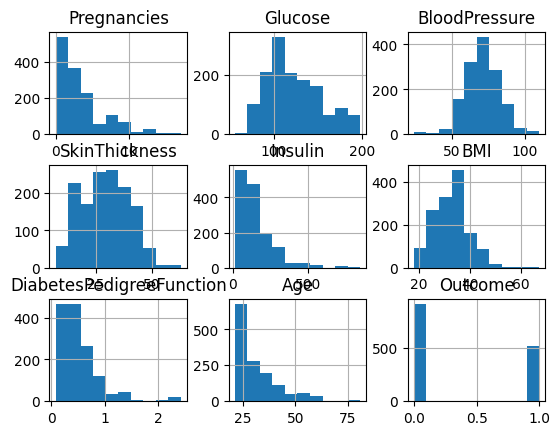

In [2]:
#Loading data and creating a test train split:

data=pd.read_csv("Diabetes.csv")
train_data, test_data = train_test_split(data, test_size=0.3, random_state=33)
data.hist()


In [3]:
print(train_data.head())
print(test_data.head())

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
415             0      135             94             46      145  40.6   
1408            2      106             56             27      165  29.0   
388             1      143             84             23      310  42.4   
993             4      173             70             14      168  29.7   
1190            1       95             60             18       58  23.9   

      DiabetesPedigreeFunction  Age  Outcome  
415                      0.284   26        0  
1408                     0.426   22        0  
388                      1.076   22        0  
993                      0.361   33        1  
1190                     0.260   22        0  
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
787             3       74             68             28       45  29.7   
290             9      134             74             33       60  25.9   
1021            1      181             64 

In [4]:
train_data_X = train_data.iloc[:,0:8].values
train_data_Y = train_data.iloc[:,8:9].values
test_data_X = test_data.iloc[:,0:8].values
test_data_Y= test_data.iloc[:,8:9].values

# Add a standard scalar
scaler = StandardScaler()
train_data_X = scaler.fit_transform(train_data_X)
test_data_X = scaler.fit_transform(test_data_X)

model = Sequential()
model.add(Dense(64, activation="relu", input_shape=(train_data_X.shape[1],)))
model.add(Dense(32))
model.add(Dense(32))
model.add(Dense(32))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(8))
model.add(Dense(1,activation="sigmoid"))

model.summary()

c:\Users\14158\miniconda3\envs\internship\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,497 (25.38 KB)

 Trainable params: 6,497 (25.38 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [6]:
history = model.fit(train_data_X,train_data_Y, batch_size=64, epochs=25, validation_split=0.2)

Epoch 1/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.6226 - loss: 0.6344 - val_accuracy: 0.7550 - val_loss: 0.4748
Epoch 2/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7711 - loss: 0.4623 - val_accuracy: 0.7650 - val_loss: 0.4307
Epoch 3/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7849 - loss: 0.4603 - val_accuracy: 0.7950 - val_loss: 0.4090
Epoch 4/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8097 - loss: 0.4380 - val_accuracy: 0.7850 - val_loss: 0.3894
Epoch 5/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7915 - loss: 0.4335 - val_accuracy: 0.7950 - val_loss: 0.3763
Epoch 6/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8394 - loss: 0.4022 - val_accuracy: 0.8000 - val_loss: 0.3672
Epoch 7/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8464 - loss: 0.3849 - val_accuracy: 0.8250 - val_loss: 0.3724
Epoch 8/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8304 - loss: 0.3712 - val_accuracy: 0.8150 - val_loss

In [7]:
# Saving the Model: 
model.save('./saved_models/saved_model2.keras')

# Epochs vs Loss
***

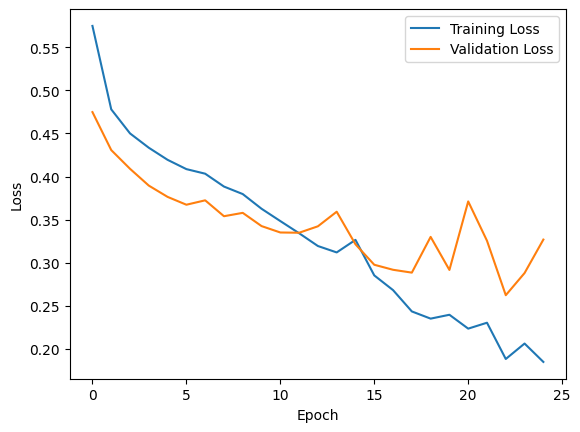

In [8]:

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



# Epoch vs Accuracy:
***

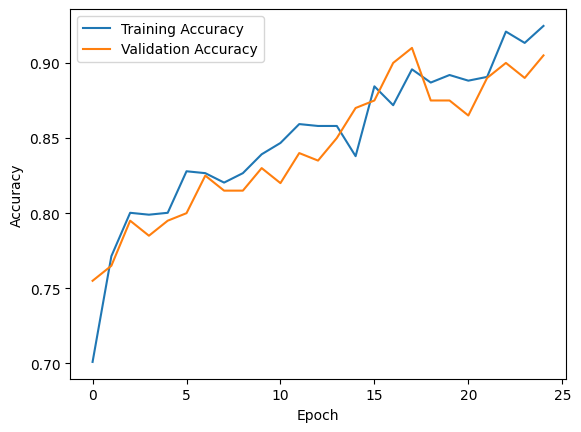

In [9]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Testing Brute force inputs: 
***

In [13]:
import numpy as np
from tensorflow.keras.models import load_model

model = load_model('./saved_models/saved_model2.keras')

# Assuming these are the features: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age



# Convert the list of features into a 2D NumPy array with shape (1, number_of_features)
features_array = np.array([features])  # Notice the extra brackets to create a 2D array with one row    
print(type(features_array))
# Make a prediction
prediction = model.predict(features_array)
prediction_val = prediction[0][0]
print(features_array)
print(prediction)
print(prediction_val)
if prediction_val == 1.0:
    print("Im sorry my friend, you have diabetes")
else:
    print("Yipee!, no diabetes detected")


<class 'numpy.ndarray'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[[12.    70.    74.    40.    54.    35.3    0.378 48.   ]]
[[1.]]
1.0
Im sorry my friend, you have diabetes


In [26]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model

# Load the model
model = load_model('./saved_models/saved_model2.keras')

# Load the data from the CSV file
data = pd.read_csv('./Diabetes.csv')

# Assuming the data columns are ordered as follows:
# Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFuteres not necesesarygon, Y._fcK
# Here, we assume the 'Outcome' column is the last column in the dataset
features = data.iloc[:150, :-1]
true_outcomes = data.iloc[:150, -1]  # Assuming 'Outcome' is the last column

# print(features)
# print("\n\n\n")
# print(true_outcomes)

# Convert the data to a NumPy array
features_array = features.to_numpy()

# Make predictions
predictions = model.predict(features_array)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Compare predictions with the actual outcomes
correct_predictions = (predicted_classes == true_outcomes).sum()
total_cases = len(true_outcomes)

# Calculate the percentage of correct predictions
accuracy_percentage = 100 * correct_predictions / total_cases
print(f"Accuracy: {accuracy_percentage}%")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Accuracy: 38.666666666666664%
